<a href="https://colab.research.google.com/github/nadiakhoo/CyberbullyingDetector/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Imports and Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDClassifier, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, roc_curve, auc
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_regression, mutual_info_classif, mutual_info_regression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from time import time
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/COMP4211 Project Data/cyberbullying_tweets.csv")

In [ ]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


## General Dataset Descriptions


In [ ]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
# data shape
df.shape

(47692, 2)

In [ ]:
# count for each cyberbullying type
cyberbullying_count  = df['cyberbullying_type'].value_counts()
cyberbullying_count

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

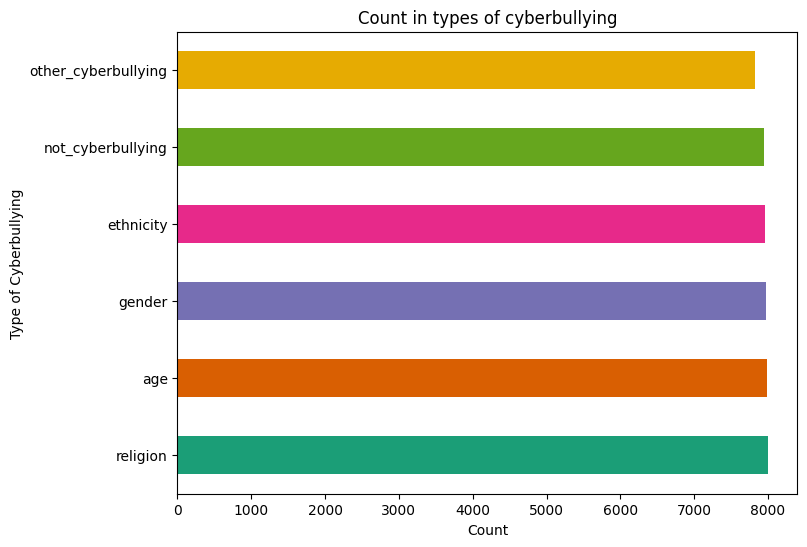

In [ ]:
# plot for count for each cyberbullying type
plt.figure(figsize = (8, 6))
cyberbullying_count.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Count in types of cyberbullying')
plt.xlabel('Count')
plt.ylabel('Type of Cyberbullying')
plt.show()

In [ ]:
# check if there are na values
df.isna().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
# check if there are duplicated tweets
df.duplicated().sum()

36

In [ ]:
# remove duplicated tweets
df = df.drop_duplicates()

df.duplicated().sum()

0

In [ ]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


## Preprocessing tweets

In [ ]:
# change all letters to lowercase, remove special characters
df.loc[:, 'tweet_text'] = df['tweet_text'].str.lower().str.replace(r'[><?*()^%$!\-+=\[\]{}]', ' ', regex=True)

# remove more special characters
df.loc[:, 'tweet_text'] = df['tweet_text'].str.replace(r'[_\',]', ' ', regex=True)

In [ ]:
pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 7.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=422485c7e307a585e5596f7b432398d5b8810b2dd8059f9fe0fe4d0c5555e9cb
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
from cleantext import clean

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# using as test case
display(df.iloc[21])

tweet_text            kids love😘❤ @ mohamad bin zayed city مدينة محم...
cyberbullying_type                                    not_cyberbullying
Name: 21, dtype: object

In [ ]:
# remove emojis and make sure language is english
for index, row in df.iterrows():
    cleaned_text = clean(row['tweet_text'], no_emoji=True, lang="en")
    df.at[index, 'tweet_text'] = cleaned_text

In [ ]:
# using as test case
display(df.iloc[21])
df.head()

tweet_text            kids love @ mohamad bin zayed city http://t.co...
cyberbullying_type                                    not_cyberbullying
Name: 21, dtype: object

,tweet_text,cyberbullying_type
0,in other words #katandandre your food was crap...,not_cyberbullying
1,why is #aussietv so white #mkr #theblock #imac...,not_cyberbullying
2,@xochitlsuckkks a classy whore or more red vel...,not_cyberbullying
3,@jason gio meh. :p thanks for the heads up but...,not_cyberbullying
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying


In [ ]:
import re
from nltk.corpus import stopwords

# remove url
df.loc[:, 'tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(r"http?://\S+|www\.\S+", "", x))

# remove #hashtags
df.loc[:, 'tweet_text'] = df['tweet_text'].str.replace(r'#([^\s]+)', '', regex=True)

# remove @mentions
df.loc[:, 'tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(r"@\S+", "", x))

# remove stopwords
stop_words = set(stopwords.words('english'))
df.loc[:, 'tweet_text']= df['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# remove numbers
df.loc[:, 'tweet_text'] = df['tweet_text'].str.replace(r'\d+', '', regex=True)

# replace newline and returns with space
df.loc[:, 'tweet_text'] = df['tweet_text'].str.replace(r'\n|\r', ' ', regex=True)

# change all letters to lowercase, remove special characters
df.loc[:, 'tweet_text'] = df['tweet_text'].str.lower().str.replace(r'[_]', ' ', regex=True)
# remove more special characters
df.loc[:, 'tweet_text'] = df['tweet_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# remove multiple spaces
df.loc[:, 'tweet_text'] = df['tweet_text'].str.replace(r'\s+', ' ', regex=True)

# remove "rt" (retweet)
df.loc[:, 'tweet_text'] = df['tweet_text'].str.replace(r'\brt\b', '', regex=True)

# remove empty entries at the end
df = df[df['tweet_text'].str.strip().astype(bool)]


In [ ]:
# using as test case
display(df.iloc[21])

tweet_text            kids love mohamad bin zayed city
cyberbullying_type                   not_cyberbullying
Name: 21, dtype: object

In [ ]:
# removing full stops and colons
df.loc[:, 'tweet_text'] = df['tweet_text'].str.replace(r'[.:]', ' ', regex=True)

In [ ]:
df

,tweet_text,cyberbullying_type
0,words food crapilicious,not_cyberbullying
1,white,not_cyberbullying
2,classy whore red velvet cupcakes,not_cyberbullying
3,gio meh p thanks heads concerned another angry...,not_cyberbullying
4,isis account pretending kurdish account like i...,not_cyberbullying
...,...,...
47687,black ppl expected anything depended anything ...,ethnicity
47688,turner withhold disappointment turner called c...,ethnicity
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity
47690,yea fuck youre nigger fucking unfollow fuckin...,ethnicity


In [ ]:
# lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df.loc[:, 'tweet_text'] = df['tweet_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# check for duplicates
df.duplicated().sum()

930

In [ ]:
# remove duplicates again
df = df.drop_duplicates()

df.duplicated().sum()

0

In [ ]:
# !pip install langdetect

In [ ]:
# saving length before to check if it works
length_before = len(df)
length_before

46336

In [ ]:
from langdetect import detect

df = df[df['tweet_text'].apply(lambda x: detect(x) == 'en')]

In [ ]:
# saving length after for comparison
# dataset did decrease in length hence should be successful detection
length_after = len(df)
length_after

In [ ]:
# since lang detect takes a long time, the new df after preproprecessing is saved to a new csv to load for models
# df.to_csv('/content/drive/My Drive/COMP4211 Project Data/df_after_langdetect.csv', index=False)

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/COMP4211 Project Data/df_after_langdetect.csv")

In [ ]:
df2

,tweet_text,cyberbullying_type
0,word food crapilicious,not_cyberbullying
1,white,not_cyberbullying
2,classy whore red velvet cupcake,not_cyberbullying
3,gio meh p thanks head concerned another angry ...,not_cyberbullying
4,isi account pretending kurdish account like is...,not_cyberbullying
...,...,...
39012,shut fuck upabout dumb app acting like nagging...,ethnicity
39013,black ppl expected anything depended anything ...,ethnicity
39014,turner withhold disappointment turner called c...,ethnicity
39015,swear god dumb nigger bitch got bleach hair re...,ethnicity


In [ ]:
# getting tweet text lengths
df2['tweet_length'] = df2['tweet_text'].apply(lambda x: len(x.split()))

# filter off short and long tweets
df2 = df2[(df2['tweet_length'] >= 5) & (df2['tweet_length'] <= 100)]
df2 = df2.drop(columns =['tweet_length'])

df2

,tweet_text,cyberbullying_type
2,classy whore red velvet cupcake,not_cyberbullying
3,gio meh p thanks head concerned another angry ...,not_cyberbullying
4,isi account pretending kurdish account like is...,not_cyberbullying
5,yes test god good bad indifferent weird whatev...,not_cyberbullying
7,rebecca black drop school due bullying,not_cyberbullying
...,...,...
39016,shut fuck upabout dumb app acting like nagging...,ethnicity
39017,black ppl expected anything depended anything ...,ethnicity
39018,turner withhold disappointment turner called c...,ethnicity
39019,swear god dumb nigger bitch got bleach hair re...,ethnicity


In [ ]:
# since other_cyberbulling is pretty vague and not as specific as other types, we will remove it
df2 = df2[df2['cyberbullying_type'] != 'other_cyberbullying']

In [ ]:
df2

,tweet_text,cyberbullying_type
2,classy whore red velvet cupcake,not_cyberbullying
3,gio meh p thanks head concerned another angry ...,not_cyberbullying
4,isi account pretending kurdish account like is...,not_cyberbullying
5,yes test god good bad indifferent weird whatev...,not_cyberbullying
7,rebecca black drop school due bullying,not_cyberbullying
...,...,...
39012,shut fuck upabout dumb app acting like nagging...,ethnicity
39013,black ppl expected anything depended anything ...,ethnicity
39014,turner withhold disappointment turner called c...,ethnicity
39015,swear god dumb nigger bitch got bleach hair re...,ethnicity


## Visualising Processed Data

### Overall Trends

In [ ]:
import pandas as pd
from collections import Counter
import re

# getting count of each word in accumulation of all the tweets
def count_words(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(words)

word_counts = df2['tweet_text'].apply(count_words).sum()

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
word_counts_df = word_counts_df.sort_values(by ='count', ascending =False)
print(word_counts_df)


                  word  count
35              school   8787
78                girl   5305
911               high   5006
19                like   4891
168                  u   4718
...                ...    ...
18628      understated      1
18626       publicises      1
18623  internationally      1
18621       critisised      1
33649         reeeeeal      1

[33650 rows x 2 columns]


In [ ]:
# removing words with count less than 1000
words_count_df_1000 = word_counts_df.query('count > 1000')
len(words_count_df_1000)

67

In [ ]:
words_count_df_1000

,word,count
35,school,8787
78,girl,5305
911,high,5006
19,like,4891
168,u,4718
...,...,...
20,islam,1076
589,life,1060
559,guy,1053
107,need,1032


In [ ]:
# !pip install wordcloud

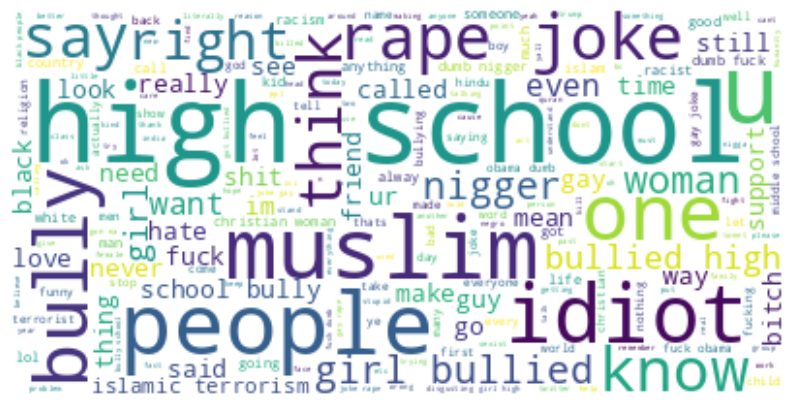

In [ ]:
# merging all tweets into a singular text string
text = ' '.join(df2['tweet_text'])

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color ='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# getting top 10 words and their counts
words_count_df_top10 = word_counts_df.head(10)
len(words_count_df_top10)

10

In [ ]:
words_count_df_top10

,word,count
35,school,8787
78,girl,5305
911,high,5006
19,like,4891
168,u,4718
341,muslim,4542
494,bullied,4394
64,bully,4353
2083,joke,4320
60,people,4311


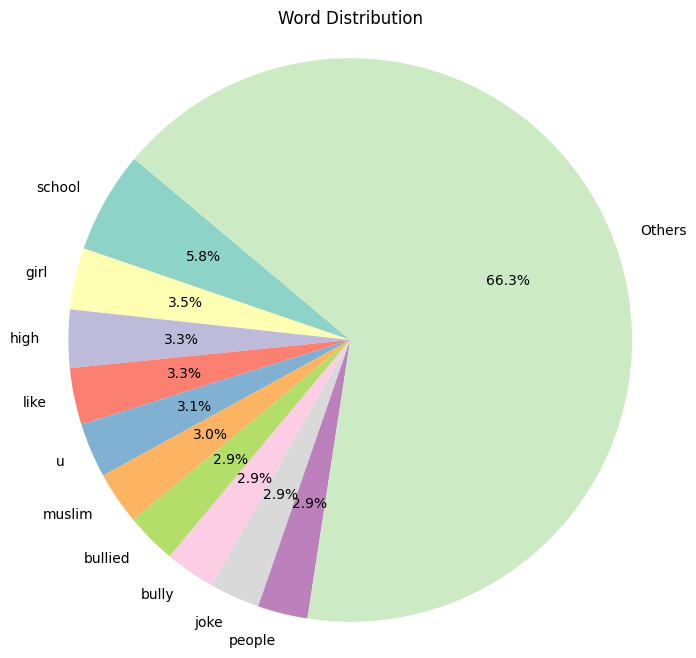

In [ ]:
# plotting the pie chart
sum_others = words_count_df_1000.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution')
plt.axis('equal')
plt.show()

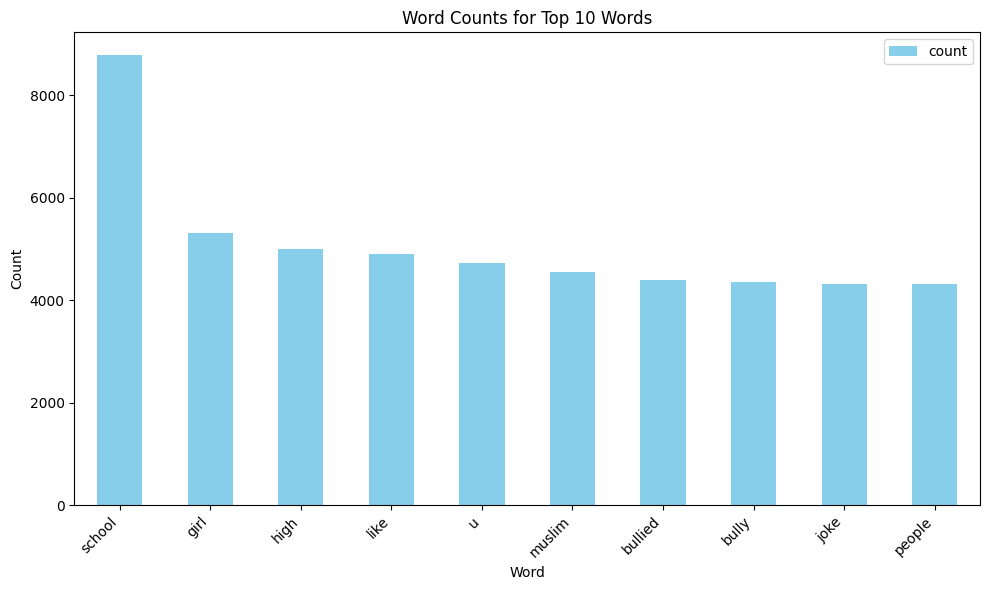

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words_count_df_top10.plot(kind='bar', x='word', y='count', color='skyblue', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()


### Non-cyberbullying Trends

In [ ]:
# filtering to get non-cyberbullying tweets
df2_non = df2[df2['cyberbullying_type'] == 'not_cyberbullying']
df2_non

,tweet_text,cyberbullying_type
2,classy whore red velvet cupcake,not_cyberbullying
3,gio meh p thanks head concerned another angry ...,not_cyberbullying
4,isi account pretending kurdish account like is...,not_cyberbullying
5,yes test god good bad indifferent weird whatev...,not_cyberbullying
7,rebecca black drop school due bullying,not_cyberbullying
...,...,...
5297,face bit differently structured look lot like ...,not_cyberbullying
5298,good luck team beautiful bbq family place,not_cyberbullying
5299,nah dont need explain hope ur well r u,not_cyberbullying
5301,argh another round instant restaurantsover,not_cyberbullying


In [ ]:
# getting count of each word in accumulation of all the tweets
# def count_words(text):
#     words = re.findall(r'\b\w+\b', text.lower())
#     return Counter(words)

word_counts = df2_non['tweet_text'].apply(count_words).sum()

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
word_counts_df = word_counts_df.sort_values(by ='count', ascending =False)
print(word_counts_df)

           word  count
35       school    287
19         like    273
60       people    243
115         get    237
100         one    223
...         ...    ...
4778     argghh      1
4775  adventure      1
4774    implies      1
4773       bard      1
8782    charity      1

[8783 rows x 2 columns]


In [ ]:
# removing words with count less than 100
words_count_df_100 = word_counts_df.query('count > 100')
len(words_count_df_100)

30

In [ ]:
words_count_df_100

,word,count
35,school,287
19,like,273
60,people,243
115,get,237
100,one,223
64,bully,223
37,bullying,218
75,know,192
134,time,189
159,would,182


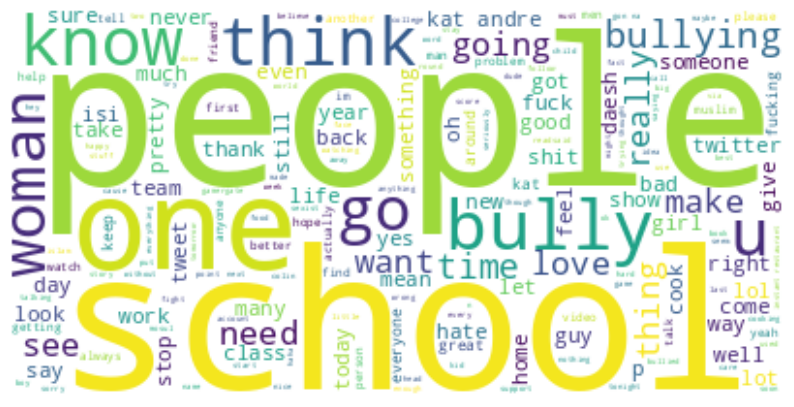

In [ ]:
# merging all tweets into a singular text string
text = ' '.join(df2_non['tweet_text'])

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color ='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# getting top 10 words and their counts
words_count_df_top10 = word_counts_df.head(10)
len(words_count_df_top10)

10

In [ ]:
words_count_df_top10

,word,count
35,school,287
19,like,273
60,people,243
115,get,237
100,one,223
64,bully,223
37,bullying,218
75,know,192
134,time,189
159,would,182


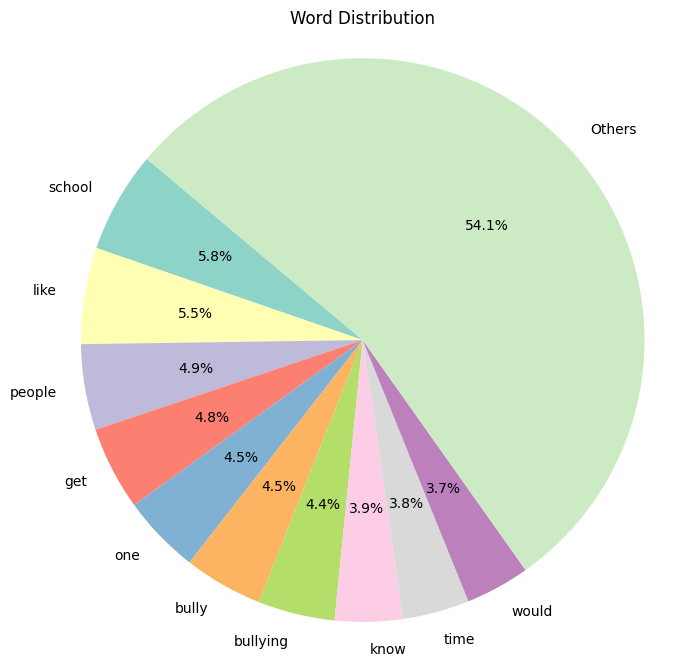

In [ ]:
# plotting the pie chart
sum_others = words_count_df_100.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution')
plt.axis('equal')
plt.show()

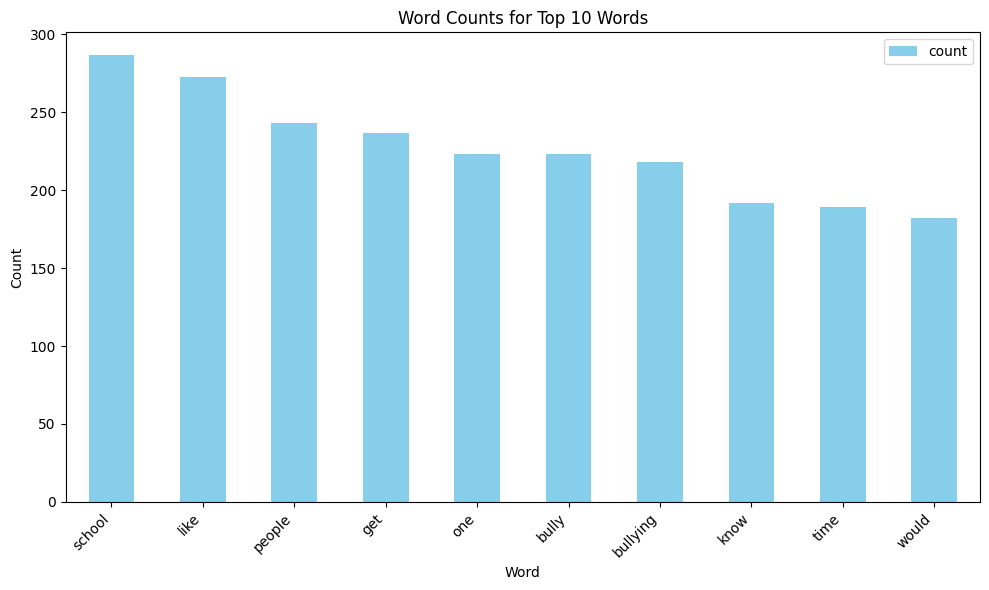

In [ ]:
# plotting a bar chart to see count of top 10 words
words_count_df_top10.plot(kind='bar', x='word', y='count', color='skyblue', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

### Gender-cyberbullying Trends

In [ ]:
# filtering to get gender cyberbullying tweets
df2_gender = df2[df2['cyberbullying_type'] == 'gender']
df2_gender

,tweet_text,cyberbullying_type
5303,rape realzvasiyana nema joke drunk gay lesbian...,gender
5304,never saw celebrity say anything like obama b ...,gender
5305,rape rape fact read one post guy getting raped...,gender
5306,also hard take company seriously re harassment...,gender
5307,idgaf gay lesbian bisexual whatever fuck fuck ...,gender
...,...,...
11728,holloway check th man even faggot ny fan stand,gender
11729,estimate guess proof called stupid ignore poli...,gender
11730,female really know know ion even use bitch dir...,gender
11732,no said woman choose gay men t made rape joke ...,gender


In [ ]:
# getting count of each word in accumulation of all the tweets
word_counts = df2_gender['tweet_text'].apply(count_words).sum()

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
word_counts_df = word_counts_df.sort_values(by ='count', ascending =False)
print(word_counts_df)

              word  count
3             joke   4182
0             rape   3495
5              gay   3377
54           woman   1099
75            call   1065
...            ...    ...
6300     jokesthis      1
6299         termi      1
6298   retardedgay      1
6296         canty      1
11278         righ      1

[11279 rows x 2 columns]


In [ ]:
# removing words with count less than 100
words_count_df_100 = word_counts_df.query('count > 100')
len(words_count_df_100)

123

In [ ]:
words_count_df_100

,word,count
3,joke,4182
0,rape,3495
5,gay,3377
54,woman,1099
75,call,1065
...,...,...
128,always,102
422,real,102
188,new,101
1288,dont,101


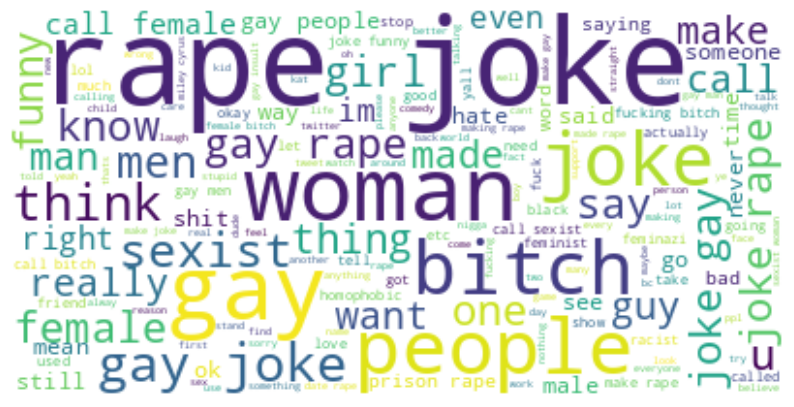

In [ ]:
# merging all tweets into a singular text string
text = ' '.join(df2_gender['tweet_text'])

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color ='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# getting top 10 words and their counts
words_count_df_top10 = word_counts_df.head(10)
len(words_count_df_top10)

10

In [ ]:
words_count_df_top10

,word,count
3,joke,4182
0,rape,3495
5,gay,3377
54,woman,1099
75,call,1065
76,female,1051
79,bitch,1042
243,people,937
84,sexist,855
17,like,795


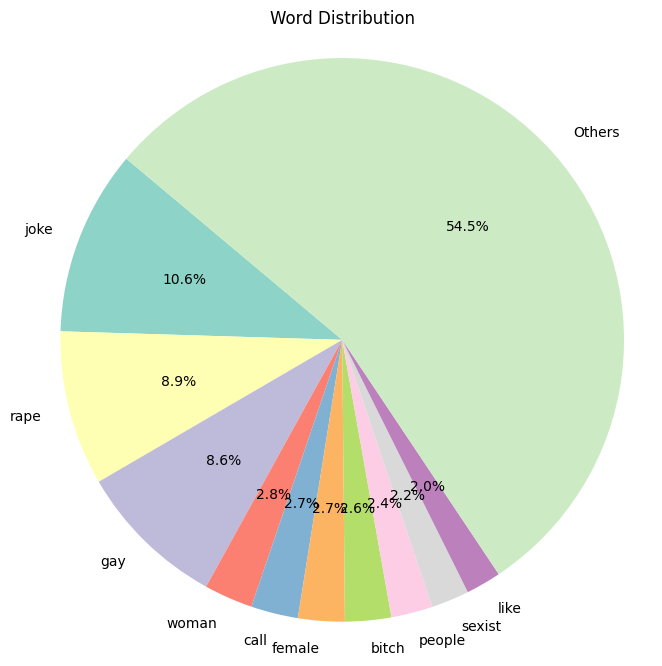

In [ ]:
# plotting the pie chart
sum_others = words_count_df_100.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution')
plt.axis('equal')
plt.show()

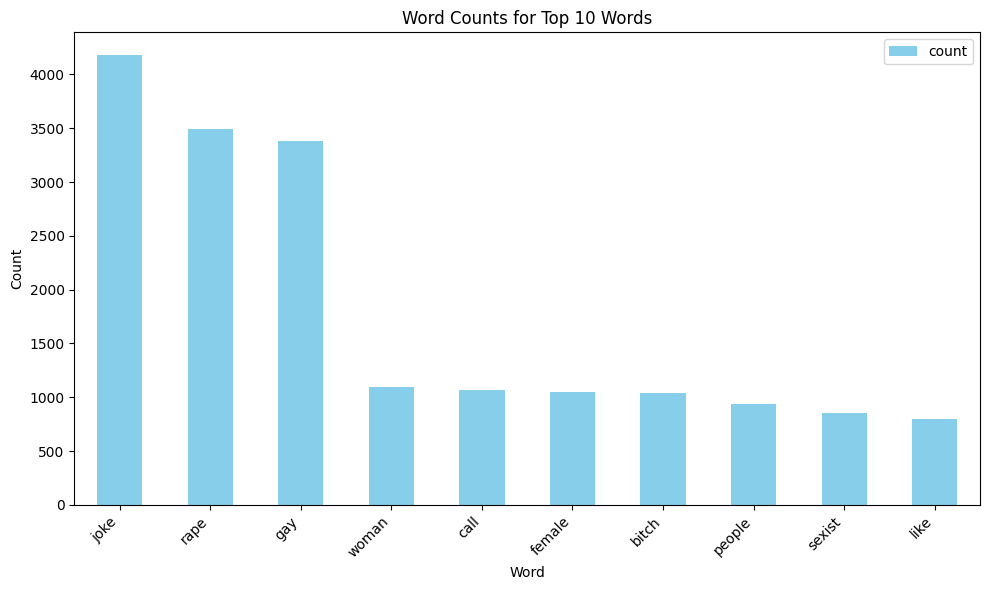

In [ ]:
# plotting a bar chart to see count of top 10 words
words_count_df_top10.plot(kind='bar', x='word', y='count', color='skyblue', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

### Religion-cyberbullying Trends

In [ ]:
# filtering to get religion cyberbullying tweets
df2_religion = df2[df2['cyberbullying_type'] == 'religion']
df2_religion

,tweet_text,cyberbullying_type
11734,sudeep invite though right getting worded okay...,religion
11735,islam never resistance oppression always sourc...,religion
11736,boy comment journalist wanting keep church clo...,religion
11737,hindu getting killed muslim terriorists kashmi...,religion
11738,white supremicists many know idiot race anti s...,religion
...,...,...
19259,rule wage suppose tell fact muhammad married y...,religion
19260,imagine christian came together like time day ...,religion
19261,support justice initial problem morphed became...,religion
19262,one thing muslim want exterminate everyone mus...,religion


In [ ]:
# getting count of each word in accumulation of all the tweets
word_counts = df2_religion['tweet_text'].apply(count_words).sum()

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
word_counts_df = word_counts_df.sort_values(by ='count', ascending =False)
print(word_counts_df)

             word  count
11         muslim   4451
12          idiot   2891
35      christian   2053
96              u   1896
108     terrorist   1322
...           ...    ...
8681          kre      1
8680       maarne      1
8679     backdown      1
8678        aimim      1
15349  injunction      1

[15350 rows x 2 columns]


In [ ]:
# removing words with count less than 100
words_count_df_100 = word_counts_df.query('count > 100')
len(words_count_df_100)

208

In [ ]:
words_count_df_100

,word,count
11,muslim,4451
12,idiot,2891
35,christian,2053
96,u,1896
108,terrorist,1322
...,...,...
1430,making,104
2365,respect,103
376,reason,102
1259,rape,102


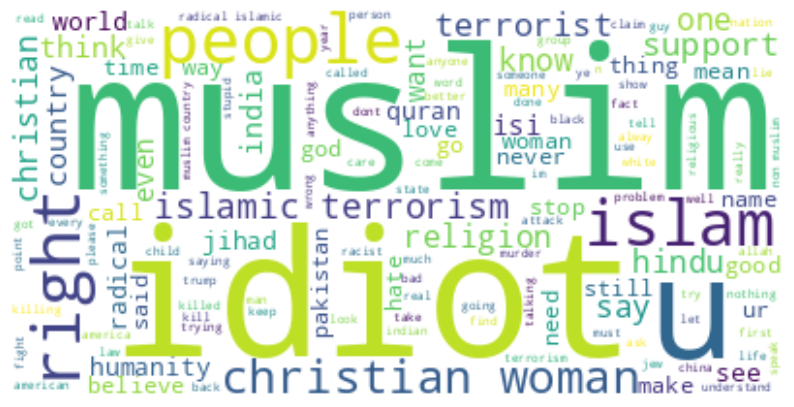

In [ ]:
# merging all tweets into a singular text string
text = ' '.join(df2_religion['tweet_text'])

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color ='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# getting top 10 words and their counts
words_count_df_top10 = word_counts_df.head(10)
len(words_count_df_top10)

10

In [ ]:
words_count_df_top10

,word,count
11,muslim,4451
12,idiot,2891
35,christian,2053
96,u,1896
108,terrorist,1322
3,right,1302
36,woman,1240
104,islamic,1223
13,like,1172
105,terrorism,1089


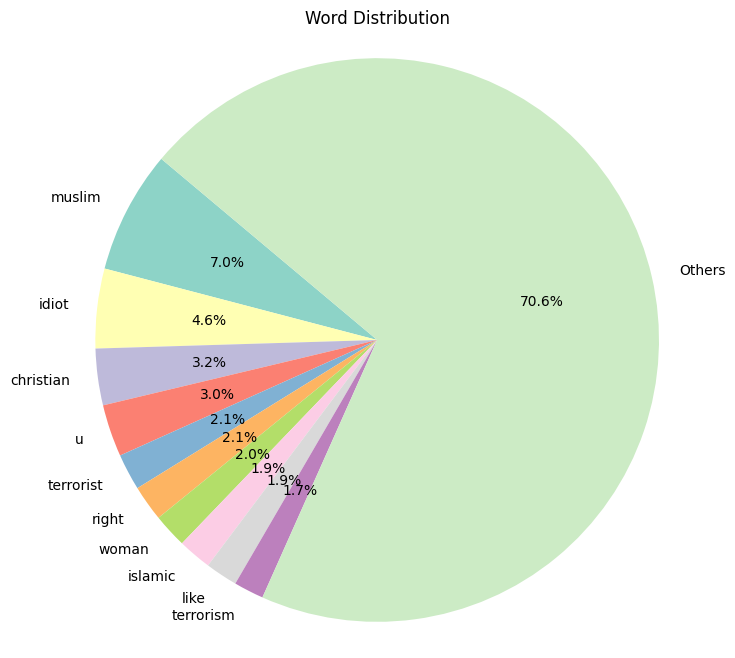

In [ ]:
# plotting the pie chart
sum_others = words_count_df_100.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution')
plt.axis('equal')
plt.show()

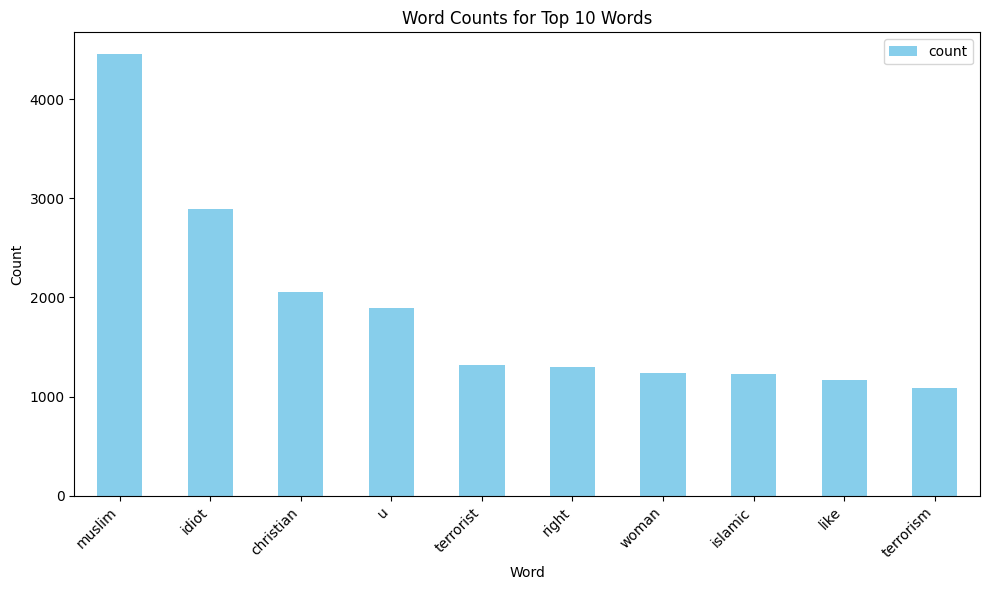

In [ ]:
# plotting a bar chart to see count of top 10 words
words_count_df_top10.plot(kind='bar', x='word', y='count', color='skyblue', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

### Age-cyberbullying Trends

In [ ]:
# filtering to get age cyberbullying tweets
df2_age = df2[df2['cyberbullying_type'] == 'age']
df2_age

,tweet_text,cyberbullying_type
24970,home neighbor pick family i mind son autistic ...,age
24971,bullied school high achieving boy use strategy...,age
24972,girl class th grade little autistic parent tho...,age
24973,he probably white gay kid suburb want shoot sc...,age
24974,pushed ti resorting treating thr bully percent...,age
...,...,...
32742,girl really tried say bullied high school real...,age
32743,bully school messing since rd grade,age
32744,remember wrote entire song th grade called bow...,age
32745,prom queen bullied girl black sheep too differ...,age


In [ ]:
# getting count of each word in accumulation of all the tweets
word_counts = df2_age['tweet_text'].apply(count_words).sum()

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
word_counts_df = word_counts_df.sort_values(by ='count', ascending =False)
print(word_counts_df)

                word  count
11            school   8283
10              high   4872
36              girl   4620
24           bullied   4314
17             bully   4096
...              ...    ...
7827          dinesh      1
7826   administering      1
7825      reconsider      1
7824       worldwide      1
13142          tryin      1

[13143 rows x 2 columns]


In [ ]:
# removing words with count less than 100
words_count_df_100 = word_counts_df.query('count > 100')
len(words_count_df_100)

183

In [ ]:
words_count_df_100

,word,count
11,school,8283
10,high,4872
36,girl,4620
24,bullied,4314
17,bully,4096
...,...,...
1113,sure,102
342,left,102
577,point,102
551,seeing,101


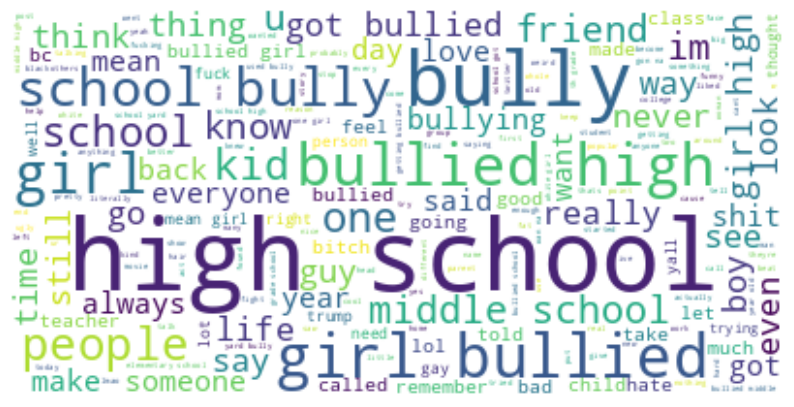

In [ ]:
# merging all tweets into a singular text string
text = ' '.join(df2_age['tweet_text'])

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color ='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# getting top 10 words and their counts
words_count_df_top10 = word_counts_df.head(10)
len(words_count_df_top10)

10

In [ ]:
words_count_df_top10

,word,count
11,school,8283
10,high,4872
36,girl,4620
24,bullied,4314
17,bully,4096
9,like,1825
68,one,1039
126,people,933
129,got,830
63,kid,800


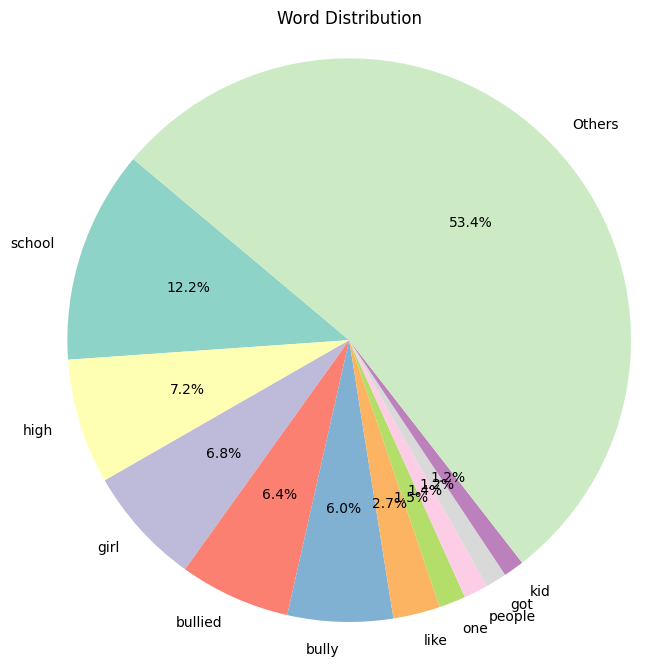

In [ ]:
# plotting the pie chart
sum_others = words_count_df_100.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution')
plt.axis('equal')
plt.show()

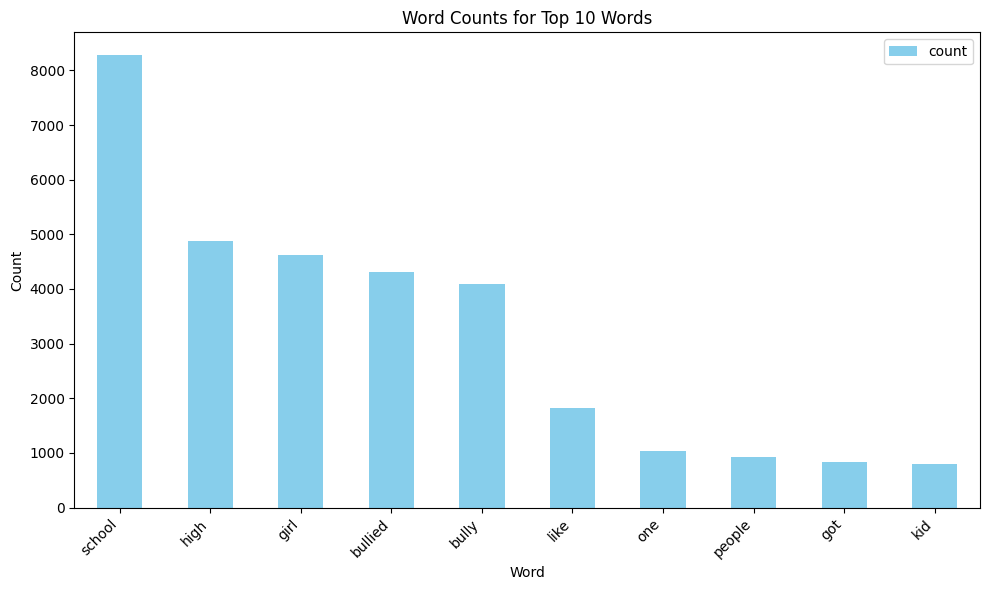

In [ ]:
# plotting a bar chart to see count of top 10 words
words_count_df_top10.plot(kind='bar', x='word', y='count', color='skyblue', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

### Ethnicity-cyberbullying Trends

In [ ]:
# filtering to get ethnicity cyberbullying tweets
df2_ethnicity = df2[df2['cyberbullying_type'] == 'ethnicity']
df2_ethnicity

,tweet_text,cyberbullying_type
32747,hey dumb fuck celebs stop something people pub...,ethnicity
32748,fuck u bitch fuck obama dumb as nigger,ethnicity
32749,joe racist many video audio clip racist shit s...,ethnicity
32750,truck look dumb fuck trying make look worse co...,ethnicity
32751,muthafuckas still ego tripping fool fuck damn ...,ethnicity
...,...,...
39016,shut fuck upabout dumb app acting like nagging...,ethnicity
39017,black ppl expected anything depended anything ...,ethnicity
39018,turner withhold disappointment turner called c...,ethnicity
39019,swear god dumb nigger bitch got bleach hair re...,ethnicity


In [ ]:
# getting count of each word in accumulation of all the tweets
word_counts = df2_ethnicity['tweet_text'].apply(count_words).sum()

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])

# sorting by descending count
word_counts_df = word_counts_df.sort_values(by ='count', ascending =False)
print(word_counts_df)

            word  count
13        nigger   3975
2           fuck   3824
1           dumb   3605
31         black   2021
12             u   1805
...          ...    ...
2719       thatz      1
2721    googling      1
7328   enlighten      1
7327   sociopath      1
12150   reeeeeal      1

[12151 rows x 2 columns]


In [ ]:
# removing words with count less than 100
words_count_df_100 = word_counts_df.query('count > 100')
len(words_count_df_100)

126

In [ ]:
words_count_df_100

,word,count
13,nigger,3975
2,fuck,3824
1,dumb,3605
31,black,2021
12,u,1805
...,...,...
211,yes,104
85,oh,104
186,bad,102
603,another,101


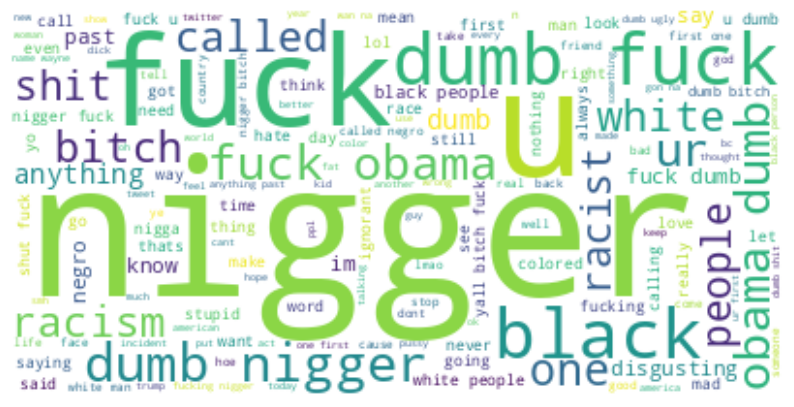

In [ ]:
# merging all tweets into a singular text string
text = ' '.join(df2_ethnicity['tweet_text'])

# creating a wordcloud where the size of the word in the image is dependent on the value of count
wc = WordCloud(background_color ='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# getting top 10 words and their counts
words_count_df_top10 = word_counts_df.head(10)
len(words_count_df_top10)

10

In [ ]:
words_count_df_top10

,word,count
13,nigger,3975
2,fuck,3824
1,dumb,3605
31,black,2021
12,u,1805
17,as,1698
60,white,1551
6,people,1145
105,one,984
91,ur,893


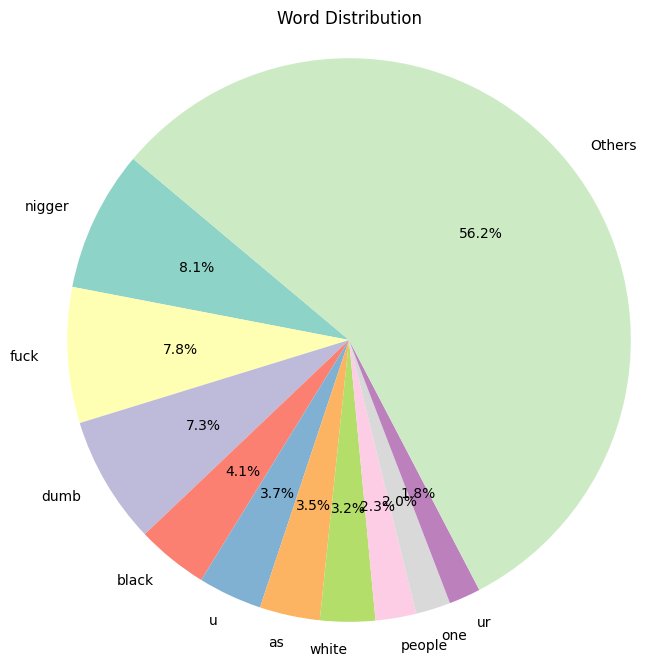

In [ ]:
# plotting the pie chart
sum_others = words_count_df_100.iloc[10:, :]['count'].sum()
words_count_df_pie = pd.concat([words_count_df_top10, pd.DataFrame({'word': ['Others'], 'count': [sum_others]})])
colors = plt.cm.Set3.colors[:len(words_count_df_pie)]

plt.figure(figsize=(8, 8))
plt.pie(words_count_df_pie['count'], labels= words_count_df_pie['word'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Word Distribution')
plt.axis('equal')
plt.show()

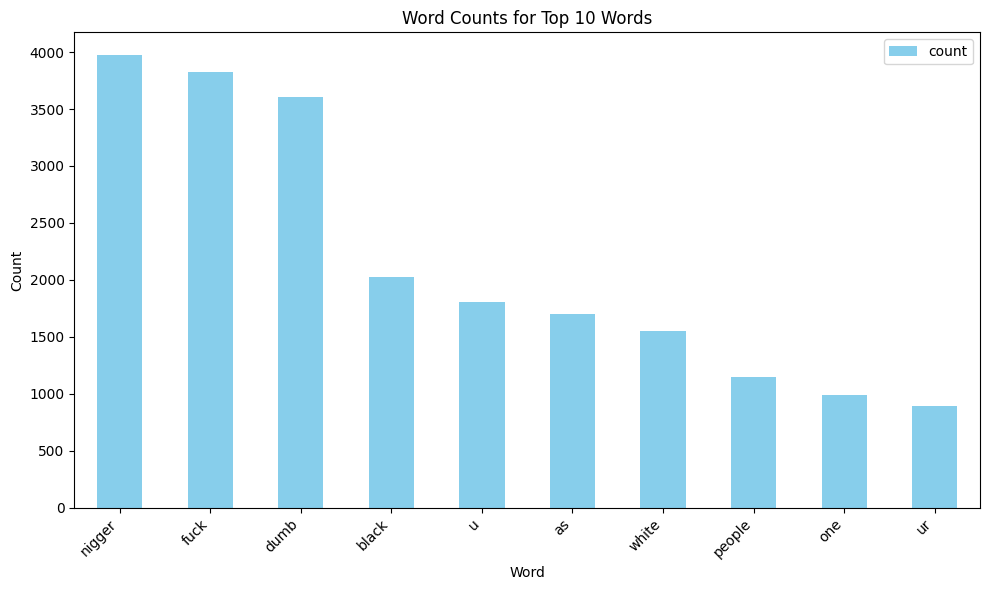

In [ ]:
# plotting a bar chart to see count of top 10 words
words_count_df_top10.plot(kind='bar', x='word', y='count', color='skyblue', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Counts for Top 10 Words')
plt.xticks(rotation =45, ha='right')
plt.tight_layout()
plt.show()

# Data Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df2['tweet_text']
y = df2['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_t = tfidf_vectorizer.fit_transform(X_train)
X_test_t = tfidf_vectorizer.transform(X_test)

# base model
model = LogisticRegression(max_iter=1000, C=1.0)
model.fit(X_train_t, y_train)

y_pred = model.predict(X_test_t)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9291896144767899
Classification Report:
                   precision    recall  f1-score   support

              age       0.95      0.99      0.97      1474
        ethnicity       0.98      0.98      0.98      1243
           gender       0.96      0.85      0.90      1254
not_cyberbullying       0.73      0.83      0.77       841
         religion       0.97      0.96      0.96      1543

         accuracy                           0.93      6355
        macro avg       0.92      0.92      0.92      6355
     weighted avg       0.93      0.93      0.93      6355



<Axes: >

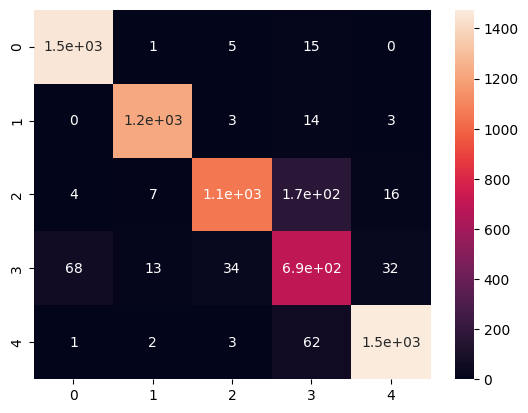

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
# hyper parameter tuning
from sklearn.model_selection import GridSearchCV

lr_param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [500, 1000, 5000],
}

lr_grid_search = GridSearchCV(LogisticRegression(), lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_t, y_train)

print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best Accuracy for Logistic Regression:", lr_grid_search.best_score_)



Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 500}
Best Accuracy for Logistic Regression: 0.9280039077513125


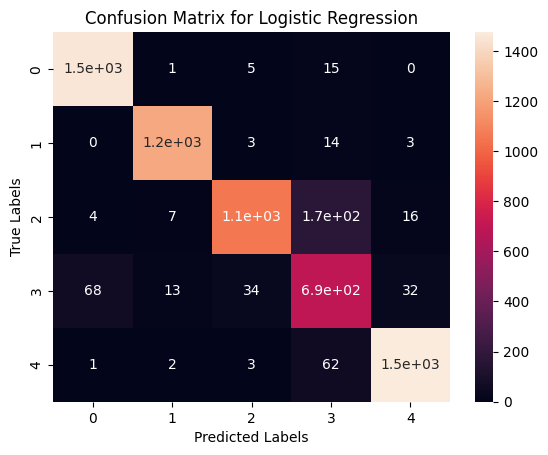

In [ ]:
best_lr_model = lr_grid_search.best_estimator_

y_pred_lr = best_lr_model.predict(X_test_t)

cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

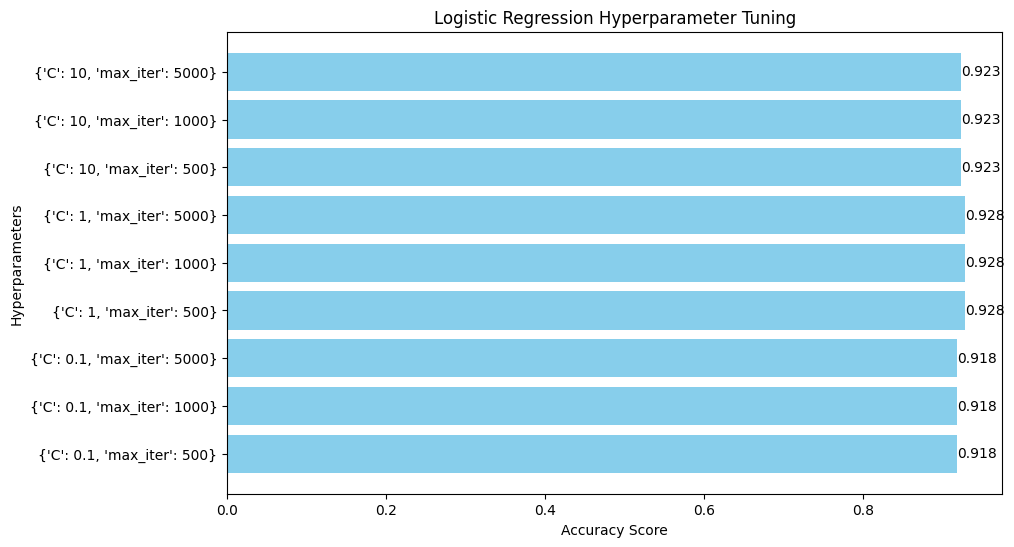

In [ ]:
import matplotlib.pyplot as plt

lr_results = lr_grid_search.cv_results_

lr_hyperparams = lr_results['params']
lr_scores = lr_results['mean_test_score']

lr_hyperparams_str = [str(param) for param in lr_hyperparams]

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(range(len(lr_scores)), lr_scores, tick_label=lr_hyperparams_str, color='skyblue')
ax.set_xlabel('Accuracy Score')
ax.set_ylabel('Hyperparameters')
ax.set_title('Logistic Regression Hyperparameter Tuning')

for i, score in enumerate(lr_scores):
    ax.text(score, i, f'{score:.3f}', va='center')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_t, y_train)

y_pred_rf = rf_model.predict(X_test_t)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9397324940991345
Random Forest Classification Report:
                   precision    recall  f1-score   support

              age       0.99      0.98      0.98      1474
        ethnicity       1.00      0.99      0.99      1243
           gender       0.94      0.87      0.90      1254
not_cyberbullying       0.75      0.87      0.81       841
         religion       0.97      0.95      0.96      1543

         accuracy                           0.94      6355
        macro avg       0.93      0.93      0.93      6355
     weighted avg       0.94      0.94      0.94      6355



<Axes: >

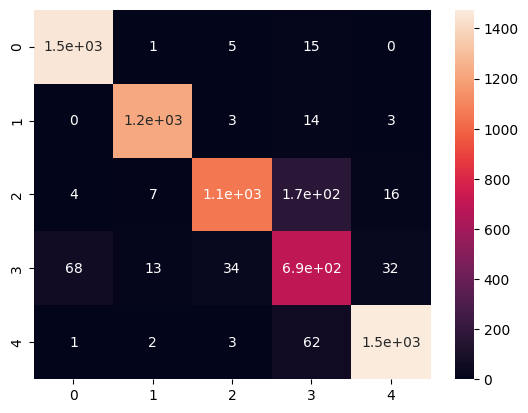

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:

# hyperparameters grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 2],
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train_t, y_train)

print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Accuracy for Random Forest:", rf_grid_search.best_score_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best Accuracy for Random Forest: 0.9397277885758873


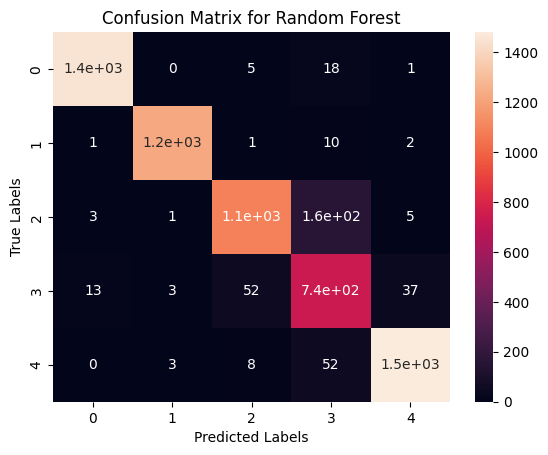

In [ ]:
best_rf_model = rf_grid_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test_t)

cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

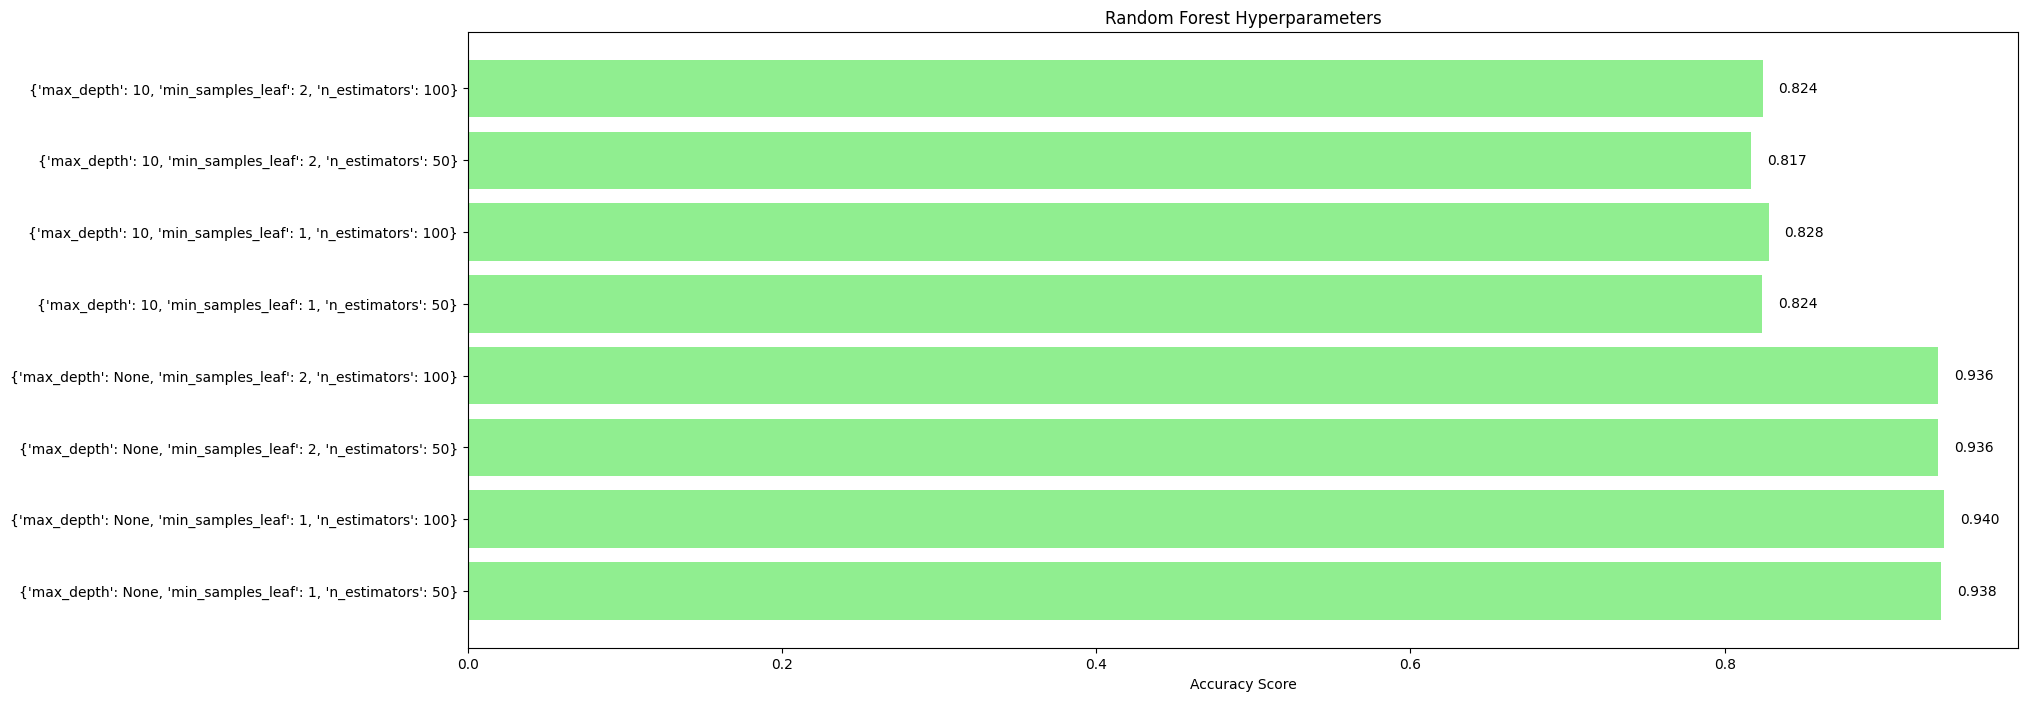

In [ ]:
fig, ax_rf = plt.subplots(figsize=(20, 8))

rf_results = rf_grid_search.cv_results_
rf_best_scores = rf_results['mean_test_score']
rf_hyperparams = rf_results['params']
rf_hyperparams_str = [str(param) for param in rf_hyperparams]

ax_rf.barh(np.arange(len(rf_best_scores)), rf_best_scores, tick_label =rf_hyperparams_str, color='lightgreen')
ax_rf.set_xlabel('Accuracy Score')
ax_rf.set_title('Random Forest Hyperparameters')

for i, score in enumerate(rf_best_scores):
    ax_rf.text(score + 0.01, i, f'{score:.3f}', va ='center')